In [14]:
# 2. Adım: Veri ve Modelleri Yükleme

import pandas as pd
import os

# 2.1 Orijinal metin CSV’lerini yükleyelim
df_lem_text  = pd.read_csv('cleaned_lemmatized.csv')
df_stem_text = pd.read_csv('cleaned_stemmed.csv')

# Kontrol: sütun isimleri ve kaç satır var?
print("Lemmatized metin dosyası sütunları:", df_lem_text.columns.tolist())
print("Lemmatized satır sayısı:", len(df_lem_text))
print("Stemmed   metin dosyası sütunları:", df_stem_text.columns.tolist())
print("Stemmed   satır sayısı:", len(df_stem_text))

# 2.2 TF-IDF vektör CSV’lerini yükleyelim
df_lem_vec  = pd.read_csv('tfidf_lemmatized.csv')
df_stem_vec = pd.read_csv('tfidf_stemmed.csv')

# Kontrol: vektör matrisinin boyutları
print("\nTF-IDF Lemmatized vektör matrisi şekli:", df_lem_vec.shape)
print("TF-IDF Stemmed     vektör matrisi şekli:", df_stem_vec.shape)

# 2.3 models/ klasöründeki Word2Vec dosyalarının listesini alalım
w2v_files = sorted([f for f in os.listdir('.') if f.startswith('word2vec') and f.endswith('.model')])
print("\nYüklenebilecek Word2Vec modelleri:")
for fname in w2v_files:
    print(" -", fname)


Lemmatized metin dosyası sütunları: ['artist', 'song', 'cleaned_text']
Lemmatized satır sayısı: 57650
Stemmed   metin dosyası sütunları: ['artist', 'song', 'cleaned_text']
Stemmed   satır sayısı: 57650

TF-IDF Lemmatized vektör matrisi şekli: (57650, 1000)
TF-IDF Stemmed     vektör matrisi şekli: (57650, 1000)

Yüklenebilecek Word2Vec modelleri:
 - word2vec_lemmatized_vs100_w10_sg0_hs0.model
 - word2vec_lemmatized_vs100_w10_sg0_hs1.model
 - word2vec_lemmatized_vs100_w10_sg1_hs0.model
 - word2vec_lemmatized_vs100_w10_sg1_hs1.model
 - word2vec_lemmatized_vs100_w5_sg0_hs0.model
 - word2vec_lemmatized_vs100_w5_sg0_hs1.model
 - word2vec_lemmatized_vs100_w5_sg1_hs0.model
 - word2vec_lemmatized_vs100_w5_sg1_hs1.model
 - word2vec_stemmed_vs100_w10_sg0_hs0.model
 - word2vec_stemmed_vs100_w10_sg0_hs1.model
 - word2vec_stemmed_vs100_w10_sg1_hs0.model
 - word2vec_stemmed_vs100_w10_sg1_hs1.model
 - word2vec_stemmed_vs100_w5_sg0_hs0.model
 - word2vec_stemmed_vs100_w5_sg0_hs1.model
 - word2vec_stemme

In [15]:
# Örnek index (tek)
sample_idx = 42   # dilediğinize göre değiştirin

# Tek metni her iki tablodan da okuyalım
sample_text = df_lem_text.loc[sample_idx, 'cleaned_text']

print(f"🔹 Seçilen Örnek Metin (index {sample_idx}):\n{sample_text}")


🔹 Seçilen Örnek Metin (index 42):
got appointment work keepin busy day theyre thing keep thinkin oh baby miss know im never gonna make oh im restless dont care say lose temper ten time day still even worse night way bad oh bad somehow id doin alright wasnt night wasnt night think could make id courage left fight wasnt night wasnt night think could take fear time shadow start fall sittin alone starin wall even could see light wasnt night even could see light think could make somehow id doin alright wasnt night wasnt night think could take noone turn know prepared something like see clearly thing miss oh baby feel bad know im never gonna make got business help day people must write bill must pay everythings different night way bad oh bad somehow id alright wasnt night wasnt night think could make id courage left fight wasnt night wasnt night think could take fear time shadow start fall sittin alone starin wall even could see light wasnt night even could see light think could make guess f

🏅 Lemmatized TF-IDF — En Benzer 5 Doküman:
1. idx=42081, score=0.6542
   → wasnt shamed fair say wanted work gave chance wasnt hurt thats credit im worth d ...

2. idx=31210, score=0.6148
   → knew first night met something wasnt quite right loving like innocent stranger s ...

3. idx=33890, score=0.5998
   → wasnt fooling around everythings true said take seriously darling please take wa ...

4. idx=52656, score=0.5690
   → wasnt wasnt know weather gonna fine cant see cross streamline love wait daytime  ...

5. idx=43337, score=0.5605
   → wasnt mercy wasnt love wasnt kindness could stand wasnt cleansing wasnt blood wa ...

🏅 Stemmed TF-IDF — En Benzer 5 Doküman:
1. idx=14378, score=0.6626
   → truth like viral infect gop develop vaccin get shot local christian read room ma ...

2. idx=42081, score=0.6487
   → wasnt shame fair say want work gave chanc wasnt hurt that credit im worth dont t ...

3. idx=31210, score=0.6211
   → knew first night met someth wasnt quit right love like inno

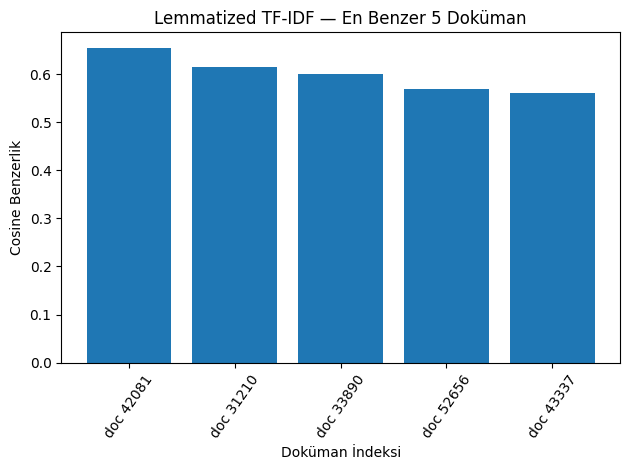

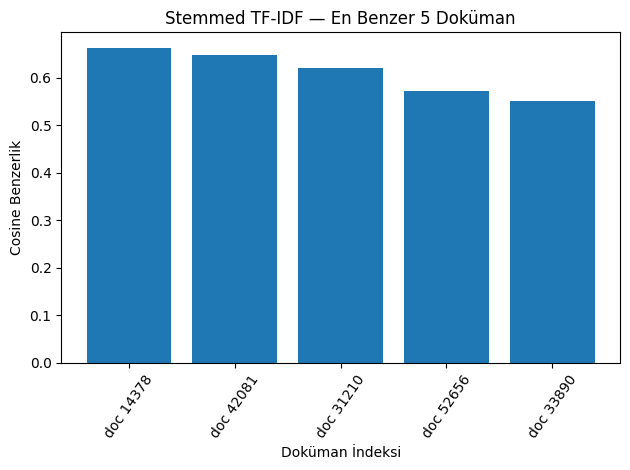

In [21]:
# 4. Adım: TF-IDF Benzerliği Hesaplama

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Önceden yüklü DataFrame’ler: 
# df_lem_text, df_stem_text, df_lem_vec, df_stem_vec
# sample_idx tanımlı: örn. 42

# 4.1) Lemmatized TF-IDF
sample_vec_lem = df_lem_vec.iloc[sample_idx].values.reshape(1, -1)
all_vecs_lem   = df_lem_vec.values
sims_lem       = cosine_similarity(sample_vec_lem, all_vecs_lem).flatten()

# En yüksek 5 benzerlik (kendisi hariç)
top5_lem_idxs  = sims_lem.argsort()[::-1][1:6]
top5_lem_scores= sims_lem[top5_lem_idxs]

print("🏅 Lemmatized TF-IDF — En Benzer 5 Doküman:")
for rank, (i, score) in enumerate(zip(top5_lem_idxs, top5_lem_scores), start=1):
    txt = df_lem_text.loc[i, 'cleaned_text']
    print(f"{rank}. idx={i}, score={score:.4f}")
    print("   →", txt[:80].replace("\n"," "), "...\n")

# 4.2) Stemmed TF-IDF
sample_vec_stem = df_stem_vec.iloc[sample_idx].values.reshape(1, -1)
all_vecs_stem   = df_stem_vec.values
sims_stem       = cosine_similarity(sample_vec_stem, all_vecs_stem).flatten()

top5_stem_idxs  = sims_stem.argsort()[::-1][1:6]
top5_stem_scores= sims_stem[top5_stem_idxs]

print("🏅 Stemmed TF-IDF — En Benzer 5 Doküman:")
for rank, (i, score) in enumerate(zip(top5_stem_idxs, top5_stem_scores), start=1):
    txt = df_stem_text.loc[i, 'cleaned_text']
    print(f"{rank}. idx={i}, score={score:.4f}")
    print("   →", txt[:80].replace("\n"," "), "...\n")

# 4. Adım: TF-IDF Benzerliği Hesaplama + Grafik

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# --- Mevcut TF-IDF Hesaplaması ---
sample_vec_lem = df_lem_vec.iloc[sample_idx].values.reshape(1, -1)
all_vecs_lem   = df_lem_vec.values
sims_lem       = cosine_similarity(sample_vec_lem, all_vecs_lem).flatten()

top5_lem_idxs   = sims_lem.argsort()[::-1][1:6]
top5_lem_scores = sims_lem[top5_lem_idxs]

sample_vec_stem = df_stem_vec.iloc[sample_idx].values.reshape(1, -1)
all_vecs_stem   = df_stem_vec.values
sims_stem       = cosine_similarity(sample_vec_stem, all_vecs_stem).flatten()

top5_stem_idxs   = sims_stem.argsort()[::-1][1:6]
top5_stem_scores = sims_stem[top5_stem_idxs]

# --- Grafik Bölümü ---

# 1) Etiket ve skor listeleri
labels_lem  = [f"doc {i}" for i in top5_lem_idxs]
labels_stem = [f"doc {i}" for i in top5_stem_idxs]

# 2) Lemmatized TF-IDF Bar Grafiği
plt.figure()
plt.bar(labels_lem, top5_lem_scores)
plt.xlabel("Doküman İndeksi")
plt.ylabel("Cosine Benzerlik")
plt.title("Lemmatized TF-IDF — En Benzer 5 Doküman")
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

# 3) Stemmed TF-IDF Bar Grafiği
plt.figure()
plt.bar(labels_stem, top5_stem_scores)
plt.xlabel("Doküman İndeksi")
plt.ylabel("Cosine Benzerlik")
plt.title("Stemmed TF-IDF — En Benzer 5 Doküman")
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()


In [23]:
# 5. Adım: Word2Vec Benzerliği Hesaplama & Tablo (Düzeltme + Debug)

import glob
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# 0) Örnek indeks
# (Daha önce sample_idx = 42 olarak ayarlamıştınız)
print("▶ sample_idx =", sample_idx)

# 1) Model dosyalarının gerçekten bulunduğu yeri kontrol edelim
#    Daha önce 'models/' altı demiştik ama sizin root'ta duruyor olabilirler
w2v_paths = sorted(glob.glob('word2vec_*.model'))
print("▶ Bulunan Word2Vec modelleri:", w2v_paths)

rows = []

for path in w2v_paths:
    model_name = path.replace('.model','')
    print(f"\n-- İşleniyor: {model_name}")

    # 2) Modeli yükle
    w2v = Word2Vec.load(path)
    
    # 3) Giriş metnini tokenize et
    tokens = df_lem_text.loc[sample_idx, 'cleaned_text'].split()
    print("   Token sayısı:", len(tokens))
    
    # 4) Sample vektörü
    vecs = [w2v.wv[t] for t in tokens if t in w2v.wv]
    print("   Bulunan token vektörü sayısı:", len(vecs))
    if not vecs:
        print("   >>> Bu modelde hiçbir token bulunamadı, atlanıyor.")
        continue
    sample_vec = np.mean(vecs, axis=0).reshape(1, -1)
    
    # 5) Tüm dokümanlar için ortalama vektörler
    all_vecs = []
    for text in df_lem_text['cleaned_text']:
        toks = text.split()
        vs = [w2v.wv[t] for t in toks if t in w2v.wv]
        all_vecs.append(np.mean(vs, axis=0) if vs else np.zeros(w2v.vector_size))
    all_vecs = np.vstack(all_vecs)
    
    # 6) Cosine similarity ve Top-5
    sims = cosine_similarity(sample_vec, all_vecs).flatten()
    top5_idxs = sims.argsort()[::-1][1:6]
    print("   Top-5 indeksleri:", top5_idxs, "skorları:", [round(float(sims[i]),4) for i in top5_idxs])
    
    for rank, idx in enumerate(top5_idxs, start=1):
        rows.append({
            "Model": model_name,
            "Rank": rank,
            "Doc Index": idx,
            "Similarity": round(float(sims[idx]), 4),
            "Snippet": df_lem_text.loc[idx, 'cleaned_text'][:80].replace("\n"," ") + "..."
        })

# 7) Sonuçları tabloya dökelim
df_w2v_top5 = pd.DataFrame(rows)
if df_w2v_top5.empty:
    print("\n!!! Hiç sonuç bulunamadı. Model yollarını ve token eşleşmelerini kontrol edin.")
else:
    display(df_w2v_top5)
    # dilerseniz CSV’ye de kaydedin:
    # df_w2v_top5.to_csv('results/word2vec_top5.csv', index=False)


▶ sample_idx = 42
▶ Bulunan Word2Vec modelleri: ['word2vec_lemmatized_vs100_w10_sg0_hs0.model', 'word2vec_lemmatized_vs100_w10_sg0_hs1.model', 'word2vec_lemmatized_vs100_w10_sg1_hs0.model', 'word2vec_lemmatized_vs100_w10_sg1_hs1.model', 'word2vec_lemmatized_vs100_w5_sg0_hs0.model', 'word2vec_lemmatized_vs100_w5_sg0_hs1.model', 'word2vec_lemmatized_vs100_w5_sg1_hs0.model', 'word2vec_lemmatized_vs100_w5_sg1_hs1.model', 'word2vec_stemmed_vs100_w10_sg0_hs0.model', 'word2vec_stemmed_vs100_w10_sg0_hs1.model', 'word2vec_stemmed_vs100_w10_sg1_hs0.model', 'word2vec_stemmed_vs100_w10_sg1_hs1.model', 'word2vec_stemmed_vs100_w5_sg0_hs0.model', 'word2vec_stemmed_vs100_w5_sg0_hs1.model', 'word2vec_stemmed_vs100_w5_sg1_hs0.model', 'word2vec_stemmed_vs100_w5_sg1_hs1.model']

-- İşleniyor: word2vec_lemmatized_vs100_w10_sg0_hs0
   Token sayısı: 256
   Bulunan token vektörü sayısı: 256
   Top-5 indeksleri: [44667 52107 12200 56605  1420] skorları: [0.9014, 0.8891, 0.882, 0.8795, 0.8793]

-- İşleniyor: wo

,Model,Rank,Doc Index,Similarity,Snippet
0,word2vec_lemmatized_vs100_w10_sg0_hs0,1,44667,0.9014,couldnt wait came late wasnt didnt care im sin...
1,word2vec_lemmatized_vs100_w10_sg0_hs0,2,52107,0.8891,made love cant say goodbye youre way ill never...
2,word2vec_lemmatized_vs100_w10_sg0_hs0,3,12200,0.8820,lost day found know know there thing wouldnt y...
3,word2vec_lemmatized_vs100_w10_sg0_hs0,4,56605,0.8795,didnt sleep wink last night cause walked night...
4,word2vec_lemmatized_vs100_w10_sg0_hs0,5,1420,0.8793,didnt say wasnt ready romance didnt promise wo...
...,...,...,...,...,...
75,word2vec_stemmed_vs100_w5_sg1_hs1,1,12242,0.9512,close paradise closer like im along ride happe...
76,word2vec_stemmed_vs100_w5_sg1_hs1,2,19322,0.9505,fogged dallas way la staring screen flight del...
77,word2vec_stemmed_vs100_w5_sg1_hs1,3,11450,0.9498,im fortyone moon full make love well touch lik...
78,word2vec_stemmed_vs100_w5_sg1_hs1,4,19964,0.9494,thought id seen change thought knew well back ...


In [26]:
import os

# Eğer yoksa results klasörünü oluştur
os.makedirs('results', exist_ok=True)

# Ardından CSV’leri kaydet
df_top5.to_csv('results/tfidf_top5.csv', index=False)
df_w2v_top5.to_csv('results/word2vec_top5.csv', index=False)
print("✅ CSV’ler kaydedildi:\n - results/tfidf_top5.csv\n - results/word2vec_top5.csv")


✅ CSV’ler kaydedildi:
 - results/tfidf_top5.csv
 - results/word2vec_top5.csv


In [27]:
import pandas as pd

tfidf_df = pd.read_csv('results/tfidf_top5.csv')
w2v_df   = pd.read_csv('results/word2vec_top5.csv')

display(tfidf_df)
display(w2v_df)



,Model,Rank,Doc Index,Similarity,Snippet
0,TF-IDF Lemmatized,1,42081,0.6542,wasnt shamed fair say wanted work gave chance ...
1,TF-IDF Lemmatized,2,31210,0.6148,knew first night met something wasnt quite rig...
2,TF-IDF Lemmatized,3,33890,0.5998,wasnt fooling around everythings true said tak...
3,TF-IDF Lemmatized,4,52656,0.5690,wasnt wasnt know weather gonna fine cant see c...
4,TF-IDF Lemmatized,5,43337,0.5605,wasnt mercy wasnt love wasnt kindness could st...
5,TF-IDF Stemmed,1,14378,0.6626,truth like viral infect gop develop vaccin get...
6,TF-IDF Stemmed,2,42081,0.6487,wasnt shame fair say want work gave chanc wasn...
7,TF-IDF Stemmed,3,31210,0.6211,knew first night met someth wasnt quit right l...
8,TF-IDF Stemmed,4,52656,0.5712,wasnt wasnt know weather gonna fine cant see c...
9,TF-IDF Stemmed,5,33890,0.5516,wasnt fool around everyth true said take serio...


,Model,Rank,Doc Index,Similarity,Snippet
0,word2vec_lemmatized_vs100_w10_sg0_hs0,1,44667,0.9014,couldnt wait came late wasnt didnt care im sin...
1,word2vec_lemmatized_vs100_w10_sg0_hs0,2,52107,0.8891,made love cant say goodbye youre way ill never...
2,word2vec_lemmatized_vs100_w10_sg0_hs0,3,12200,0.8820,lost day found know know there thing wouldnt y...
3,word2vec_lemmatized_vs100_w10_sg0_hs0,4,56605,0.8795,didnt sleep wink last night cause walked night...
4,word2vec_lemmatized_vs100_w10_sg0_hs0,5,1420,0.8793,didnt say wasnt ready romance didnt promise wo...
...,...,...,...,...,...
75,word2vec_stemmed_vs100_w5_sg1_hs1,1,12242,0.9512,close paradise closer like im along ride happe...
76,word2vec_stemmed_vs100_w5_sg1_hs1,2,19322,0.9505,fogged dallas way la staring screen flight del...
77,word2vec_stemmed_vs100_w5_sg1_hs1,3,11450,0.9498,im fortyone moon full make love well touch lik...
78,word2vec_stemmed_vs100_w5_sg1_hs1,4,19964,0.9494,thought id seen change thought knew well back ...


In [39]:
import pandas as pd

# 1) TF-IDF Top-5 CSV’sini oku
tfidf_df = pd.read_csv('results/tfidf_top5.csv')

# 2) Eşikleme fonksiyonunu tanımla (istersen kendi sözlüğünü kullanabilirsin)
def auto_score(sim):
    if sim >= 0.70: return 5
    if sim >= 0.65: return 4
    if sim >= 0.63: return 3
    if sim >= 0.60: return 2
    return 1

# 3) “Semantic Score” sütununu ekle
tfidf_df['Semantic Score'] = tfidf_df['Similarity'].apply(auto_score)

# 4) Sadece TF-IDF tablosunu göster
print("— TF-IDF Top-5 Önerileri & Semantic Score —")
display(tfidf_df[['Model','Rank','Doc Index','Similarity','Snippet','Semantic Score']])
tfidf_df.to_csv('results/tfidf_scored_with_semantic.csv', index=False)



— TF-IDF Top-5 Önerileri & Semantic Score —


,Model,Rank,Doc Index,Similarity,Snippet,Semantic Score
0,TF-IDF Lemmatized,1,42081,0.6542,wasnt shamed fair say wanted work gave chance ...,4
1,TF-IDF Lemmatized,2,31210,0.6148,knew first night met something wasnt quite rig...,2
2,TF-IDF Lemmatized,3,33890,0.5998,wasnt fooling around everythings true said tak...,1
3,TF-IDF Lemmatized,4,52656,0.5690,wasnt wasnt know weather gonna fine cant see c...,1
4,TF-IDF Lemmatized,5,43337,0.5605,wasnt mercy wasnt love wasnt kindness could st...,1
5,TF-IDF Stemmed,1,14378,0.6626,truth like viral infect gop develop vaccin get...,4
6,TF-IDF Stemmed,2,42081,0.6487,wasnt shame fair say want work gave chanc wasn...,3
7,TF-IDF Stemmed,3,31210,0.6211,knew first night met someth wasnt quit right l...,2
8,TF-IDF Stemmed,4,52656,0.5712,wasnt wasnt know weather gonna fine cant see c...,1
9,TF-IDF Stemmed,5,33890,0.5516,wasnt fool around everyth true said take serio...,1


In [38]:
import pandas as pd

# 1) Word2Vec Top-5 CSV’sini oku
w2v_df = pd.read_csv('results/word2vec_top5.csv')

# 2) Eşikleme fonksiyonunu tanımla
def auto_score(sim):
    if sim >= 0.95: return 5
    if sim >= 0.93: return 4
    if sim >= 0.90: return 3
    if sim >= 0.85: return 2
    return 1

# 3) “Semantic Score” sütununu ekle
w2v_df['Semantic Score'] = w2v_df['Similarity'].apply(auto_score)

# 4) Sadece Word2Vec tablosunu göster
print("— Word2Vec Top-5 Önerileri & Semantic Score —")
display(w2v_df[['Model','Rank','Doc Index','Similarity','Snippet','Semantic Score']])
w2v_df.to_csv('results/word2vec_scored_with_semantic.csv', index=False)



— Word2Vec Top-5 Önerileri & Semantic Score —


,Model,Rank,Doc Index,Similarity,Snippet,Semantic Score
0,word2vec_lemmatized_vs100_w10_sg0_hs0,1,44667,0.9014,couldnt wait came late wasnt didnt care im sin...,3
1,word2vec_lemmatized_vs100_w10_sg0_hs0,2,52107,0.8891,made love cant say goodbye youre way ill never...,2
2,word2vec_lemmatized_vs100_w10_sg0_hs0,3,12200,0.8820,lost day found know know there thing wouldnt y...,2
3,word2vec_lemmatized_vs100_w10_sg0_hs0,4,56605,0.8795,didnt sleep wink last night cause walked night...,2
4,word2vec_lemmatized_vs100_w10_sg0_hs0,5,1420,0.8793,didnt say wasnt ready romance didnt promise wo...,2
...,...,...,...,...,...,...
75,word2vec_stemmed_vs100_w5_sg1_hs1,1,12242,0.9512,close paradise closer like im along ride happe...,5
76,word2vec_stemmed_vs100_w5_sg1_hs1,2,19322,0.9505,fogged dallas way la staring screen flight del...,5
77,word2vec_stemmed_vs100_w5_sg1_hs1,3,11450,0.9498,im fortyone moon full make love well touch lik...,4
78,word2vec_stemmed_vs100_w5_sg1_hs1,4,19964,0.9494,thought id seen change thought knew well back ...,4


In [34]:
# 1) TF-IDF setleri
tfidf_sets = {}
for model in tfidf_df['Model'].unique():
    idxs = tfidf_df[tfidf_df['Model']==model]['Doc Index'].tolist()
    tfidf_sets[model] = set(idxs)

# 2) Word2Vec setleri
w2v_sets = {}
for model in w2v_df['Model'].unique():
    idxs = w2v_df[w2v_df['Model']==model]['Doc Index'].tolist()
    w2v_sets[model] = set(idxs)

# 3) Tüm modellerin set sözlüğü
all_sets = {**tfidf_sets, **w2v_sets}
models   = list(all_sets.keys())


In [35]:
import pandas as pd

# 4) Jaccard matrisi oluştur
jaccard = pd.DataFrame(index=models, columns=models, dtype=float)

for m1 in models:
    for m2 in models:
        A, B = all_sets[m1], all_sets[m2]
        jaccard.loc[m1, m2] = len(A & B) / len(A | B)

display(jaccard)


,TF-IDF Lemmatized,TF-IDF Stemmed,word2vec_lemmatized_vs100_w10_sg0_hs0,word2vec_lemmatized_vs100_w10_sg0_hs1,word2vec_lemmatized_vs100_w10_sg1_hs0,word2vec_lemmatized_vs100_w10_sg1_hs1,word2vec_lemmatized_vs100_w5_sg0_hs0,word2vec_lemmatized_vs100_w5_sg0_hs1,word2vec_lemmatized_vs100_w5_sg1_hs0,word2vec_lemmatized_vs100_w5_sg1_hs1,word2vec_stemmed_vs100_w10_sg0_hs0,word2vec_stemmed_vs100_w10_sg0_hs1,word2vec_stemmed_vs100_w10_sg1_hs0,word2vec_stemmed_vs100_w10_sg1_hs1,word2vec_stemmed_vs100_w5_sg0_hs0,word2vec_stemmed_vs100_w5_sg0_hs1,word2vec_stemmed_vs100_w5_sg1_hs0,word2vec_stemmed_vs100_w5_sg1_hs1
TF-IDF Lemmatized,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TF-IDF Stemmed,0.666667,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
word2vec_lemmatized_vs100_w10_sg0_hs0,0.000000,0.000000,1.000000,0.428571,0.111111,0.428571,0.666667,0.111111,0.428571,0.250000,0.428571,0.250000,0.111111,0.250000,0.428571,0.250000,0.111111,0.111111
word2vec_lemmatized_vs100_w10_sg0_hs1,0.000000,0.000000,0.428571,1.000000,0.111111,0.111111,0.428571,0.250000,0.111111,0.111111,0.250000,0.111111,0.000000,0.000000,0.250000,0.111111,0.000000,0.000000
word2vec_lemmatized_vs100_w10_sg1_hs0,0.000000,0.000000,0.111111,0.111111,1.000000,0.250000,0.111111,0.111111,0.250000,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.111111
word2vec_lemmatized_vs100_w10_sg1_hs1,0.000000,0.000000,0.428571,0.111111,0.250000,1.000000,0.250000,0.250000,0.428571,0.428571,0.111111,0.111111,0.111111,0.250000,0.111111,0.111111,0.111111,0.111111
word2vec_lemmatized_vs100_w5_sg0_hs0,0.000000,0.000000,0.666667,0.428571,0.111111,0.250000,1.000000,0.111111,0.250000,0.250000,0.666667,0.428571,0.250000,0.250000,0.666667,0.428571,0.111111,0.250000
word2vec_lemmatized_vs100_w5_sg0_hs1,0.000000,0.000000,0.111111,0.250000,0.111111,0.250000,0.111111,1.000000,0.250000,0.428571,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.250000,0.250000
word2vec_lemmatized_vs100_w5_sg1_hs0,0.000000,0.000000,0.428571,0.111111,0.250000,0.428571,0.250000,0.250000,1.000000,0.428571,0.111111,0.111111,0.111111,0.250000,0.111111,0.111111,0.250000,0.250000
word2vec_lemmatized_vs100_w5_sg1_hs1,0.000000,0.000000,0.250000,0.111111,0.428571,0.428571,0.250000,0.428571,0.428571,1.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.250000,0.250000


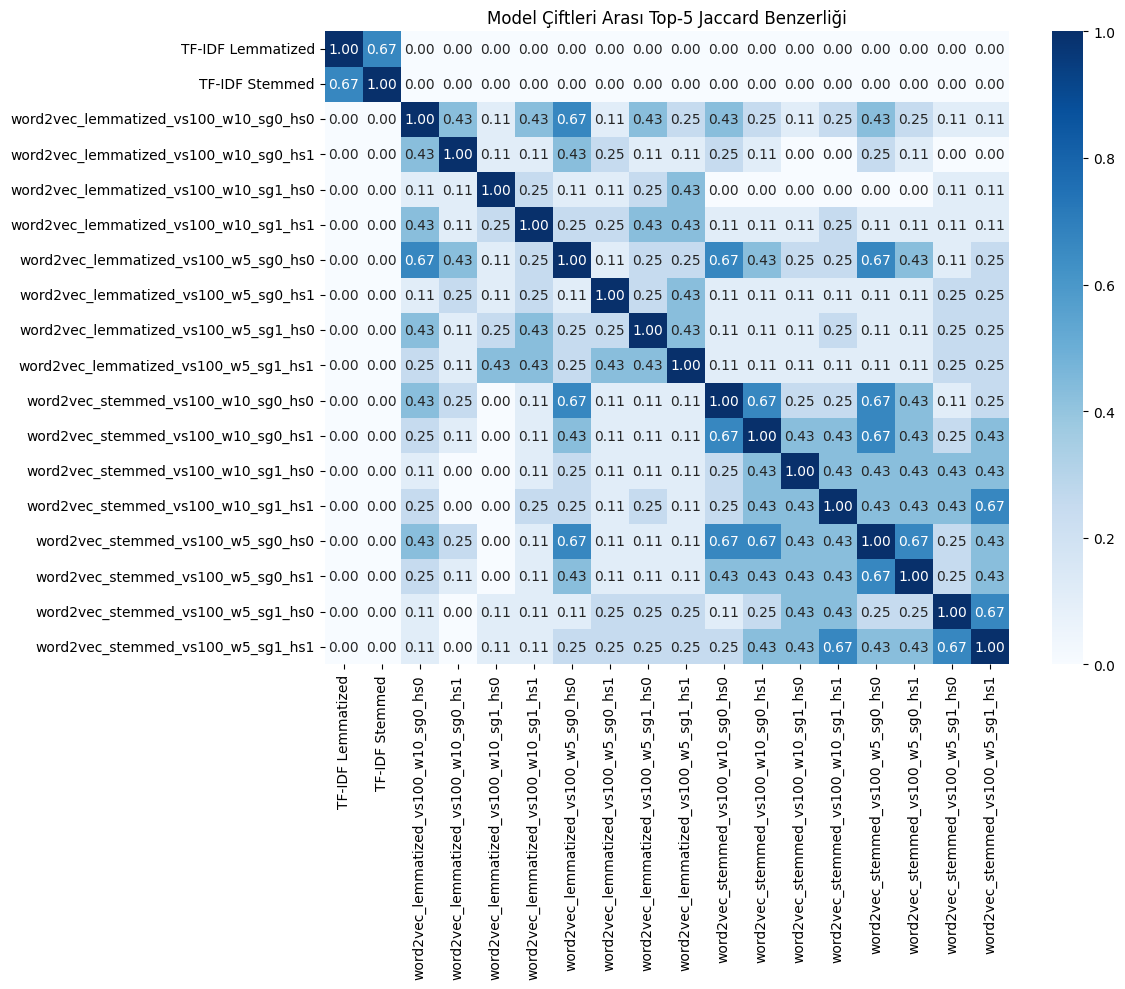

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(jaccard.astype(float), annot=True, fmt=".2f", cmap="Blues")
plt.title("Model Çiftleri Arası Top-5 Jaccard Benzerliği")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
